# Data Exploration of Cleaned Data
This notebook explores the data gathered, after it was cleaned, and new features were engineered.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

In [3]:
# set the plot style
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.5)

## Load the Data

In [4]:
# load the data
def load_data(data_dir):
    all_files = glob(os.path.join(data_dir, "cleaned_boxing_data_*.csv"))
    dataframes = {}
    for file in all_files:
        df = pd.read_csv(file)
        movement_type = file.split("_")[-3]
        df['movement_type'] = movement_type
        file_name = os.path.basename(file)
        dataframes[file_name] = df
    return dataframes

In [5]:
data_dir = '../data/cleaned/'
dfs = load_data(data_dir)

# display basic information about the datasets
for file_name, df in dfs.items():
    print(f"File: {file_name}")
    print(df.info())
    print(df.head())
    
    print("\n" + "="*50 + "\n")

File: cleaned_boxing_data_cross_20241002_190731.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   frame                 6001 non-null   float64
 1   timestamp             6001 non-null   float64
 2   movement_type         6001 non-null   object 
 3   left_shoulder         6001 non-null   object 
 4   right_shoulder        6001 non-null   object 
 5   left_elbow            6001 non-null   object 
 6   right_elbow           6001 non-null   object 
 7   left_wrist            6001 non-null   object 
 8   right_wrist           6001 non-null   object 
 9   left_hip              6001 non-null   object 
 10  right_hip             6001 non-null   object 
 11  left_shoulder_x       6001 non-null   float64
 12  left_shoulder_y       6001 non-null   float64
 13  left_shoulder_z       6001 non-null   float64
 14  right_shoulder_x    

## Analysing Movement Types

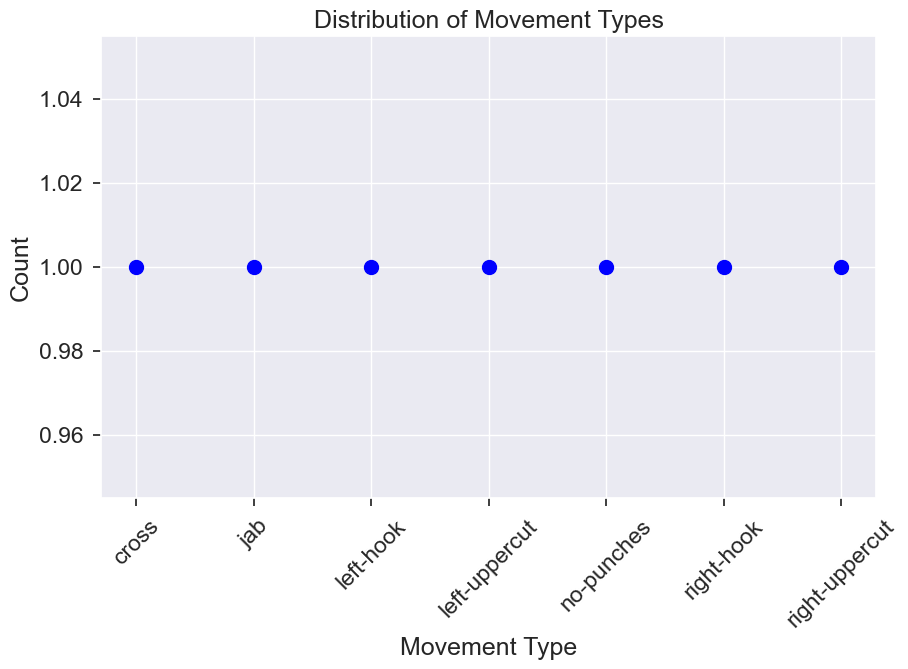

In [7]:
# Analyse Movement Types Across All files with a scatter plot
movement_counts = pd.Series({file: df['movement_type'].iloc[0] for file, df in dfs.items()}).value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(movement_counts.index, movement_counts.values, s=100, color='b')
plt.title('Distribution of Movement Types')
plt.xlabel('Movement Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Extract Coordinates

In [8]:
# extract (x, y, z) coordinates from a column
def extract_coordinates(df, column):
    coords = df[column].str.split(',', expand=True).astype(float)
    
    if coords.shape[1] != 3:
        print(f"Warning {column} doesn't contain valid coordinate data")
        return pd.DataFrame()
    
    coords.columns = [f'{column}_x', f'{column}_y', f'{column}_z']
    return coords

for file_name, df in dfs.items():
    for landmark in ['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip']:
        extracted_coords = extract_coordinates(df, landmark)
        
        if not extracted_coords.empty:
            df = pd.concat([df, extracted_coords], axis=1)
            
    dfs[file_name] = df
    print(f"Columns in {file_name}: {df.columns}")

Columns in cleaned_boxing_data_cross_20241002_190731.csv: Index(['frame', 'timestamp', 'movement_type', 'left_shoulder',
       'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist',
       'right_wrist', 'left_hip', 'right_hip', 'left_shoulder_x',
       'left_shoulder_y', 'left_shoulder_z', 'right_shoulder_x',
       'right_shoulder_y', 'right_shoulder_z', 'left_elbow_x', 'left_elbow_y',
       'left_elbow_z', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z',
       'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'right_wrist_x',
       'right_wrist_y', 'right_wrist_z', 'left_hip_x', 'left_hip_y',
       'left_hip_z', 'right_hip_x', 'right_hip_y', 'right_hip_z',
       'right_elbow_angle', 'left_elbow_angle', 'right_shoulder_angle',
       'left_shoulder_angle', 'left_shoulder_x', 'left_shoulder_y',
       'left_shoulder_z', 'right_shoulder_x', 'right_shoulder_y',
       'right_shoulder_z', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z',
       'right_elbow_x', 'right_elbow_y'